In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("./Resources/merged15_update.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15,1
1,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15,1
2,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15,1
3,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15,1
4,1,21500001,1610612737,25,18,23,28,0,0,0,0,94,0.451,0.800,0.296,22,40,15,1


# Create a Train Test Split

Use `Playoffs` for the y values

In [3]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15
1,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15
2,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15
3,1,21500001,1610612765,25,23,34,24,0,0,0,0,106,0.385,0.769,0.414,23,59,15
4,1,21500001,1610612737,25,18,23,28,0,0,0,0,94,0.451,0.800,0.296,22,40,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15249,14,21501230,1610612757,27,31,29,20,0,0,0,0,107,0.438,0.818,0.306,19,45,15
15250,14,21501230,1610612757,27,31,29,20,0,0,0,0,107,0.438,0.818,0.306,19,45,15
15251,14,21501230,1610612757,27,31,29,20,0,0,0,0,107,0.438,0.818,0.306,19,45,15
15252,14,21501230,1610612757,27,31,29,20,0,0,0,0,107,0.438,0.818,0.306,19,45,15


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
X_train.shape, X_test.shape

((11440, 18), (3814, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [8]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
importance = classifier.coef_[0]
importance

array([-0.29858164, -0.35690453, -0.40341666,  1.06835485,  0.60021678,
        0.82923787, -0.02347413,  0.75198325, -0.97253405, -0.67748513,
       -0.5458446 ,  1.03243862,  1.65617514,  0.33554974, -0.17228658,
       -1.16863844,  1.85972927, -1.15408509])

In [10]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.29858
Feature: 1, Score: -0.35690
Feature: 2, Score: -0.40342
Feature: 3, Score: 1.06835
Feature: 4, Score: 0.60022
Feature: 5, Score: 0.82924
Feature: 6, Score: -0.02347
Feature: 7, Score: 0.75198
Feature: 8, Score: -0.97253
Feature: 9, Score: -0.67749
Feature: 10, Score: -0.54584
Feature: 11, Score: 1.03244
Feature: 12, Score: 1.65618
Feature: 13, Score: 0.33555
Feature: 14, Score: -0.17229
Feature: 15, Score: -1.16864
Feature: 16, Score: 1.85973
Feature: 17, Score: -1.15409


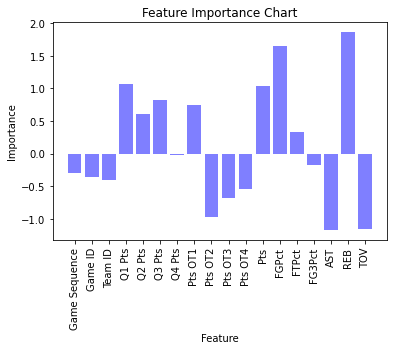

In [13]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'b', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [12]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9270104895104895
Testing Data Score: 0.9179339276350288
